# IMDB Names dataset embedding


## install libs

In [1]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 13.8 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=9cc2ba304d7878785881532a95ab69bae71731ada325ac3347c7a18a9b0f6fc5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [2]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=01f2ab1293c0a9c9f66594b0de6cb30f5dc3f0752c0957ad9e538caa06dff749
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=19c93224dad9bb14968237298ed3823d68cf7e586d94eeb824892169e69eafc1
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


## Import dataset

In [3]:
import pandas as pd
import requests
import gzip
import shutil

# IMDb names dataset URL
names_url = "https://datasets.imdbws.com/name.basics.tsv.gz"
file_name = "name.basics.tsv.gz"

# Download the dataset
response = requests.get(names_url, stream=True)
with open(file_name, "wb") as file:
    shutil.copyfileobj(response.raw, file)

# Extract the dataset
!gzip -d $file_name --force

# Load the tsv file into a pandas DataFrame
df = pd.read_csv(file_name.replace(".gz", ""), sep='\t')

# Display the first few rows of the DataFrame
print(df.head())


      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                     primaryProfession  \
0       soundtrack,actor,miscellaneous   
1                   actress,soundtrack   
2  actress,soundtrack,music_department   
3              actor,soundtrack,writer   
4                writer,director,actor   

                            knownForTitles  
0  tt0053137,tt0045537,tt0050419,tt0072308  
1  tt0117057,tt0075213,tt0038355,tt0037382  
2  tt0056404,tt0054452,tt0049189,tt0057345  
3  tt0072562,tt0080455,tt0078723,tt0077975  
4  tt0083922,tt0050976,tt0069467,tt0050986  


In [4]:
df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0045537,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0069467,tt0050986"
...,...,...,...,...,...,...
12743168,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt2455546,tt11657662"
12743169,nm9993716,Essias Loberg,\N,\N,NaN,\N
12743170,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
12743171,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [5]:
df_base = df.copy(deep=True)

## compute embeddings

Lets take a 1M sample.

In [6]:
df = df_base.sample(n=10000)

In [7]:
df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
6979094,nm2980671,Karlotta Ehrenberg,1979,\N,"writer,director,assistant_director","tt0949401,tt2874566,tt1422019,tt0806910"
7766991,nm3850300,Sara James,\N,\N,"costume_department,costume_designer",tt1623172
293213,nm0309567,Harvey Gates,1889,1948,"writer,script_department","tt0019813,tt0024366,tt0027628,tt0031715"
3875801,nm13116115,Logan Birch,\N,\N,actor,\N
4714020,nm14024913,Jörg Lichtenstein,\N,\N,actor,tt22004888


In [8]:
len(df)

10000

## option: keep family name only

And backup `primaryName` to `completeName`.

In [9]:
df['completeName'] = df['primaryName']
df['primaryName'] = df['primaryName'].str.split(' ').str.get(1)

### install and test model

In [10]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
embeddings = model.encode(sentences)
# print(embeddings)

In [11]:
embeddings.shape

(2, 768)

### compute embeddings

In [12]:
embeddings = model.encode(df.primaryName.astype(str).values, show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [13]:
embeddings.shape

(10000, 768)

## PCA

It is fast but explained variance for 10 dimensions is 0.035, which is too low to represent the underlying 384 dimensions.


In [14]:
embeddings

array([[ 0.02507945,  0.09346914,  0.00263053, ..., -0.01832297,
        -0.00676498, -0.03059809],
       [-0.00022614, -0.0501483 , -0.01552167, ...,  0.05313111,
         0.00931828, -0.04017202],
       [-0.05302705,  0.04897897, -0.03005547, ...,  0.00877171,
        -0.00987959, -0.0193597 ],
       ...,
       [-0.00359116,  0.01389828, -0.00649735, ..., -0.00558204,
        -0.00385428, -0.00912433],
       [ 0.01258683,  0.13176937, -0.01698993, ...,  0.01494455,
        -0.02760606, -0.00394759],
       [-0.02474606,  0.05490597, -0.00646066, ...,  0.01227494,
        -0.03101783, -0.00438569]], dtype=float32)

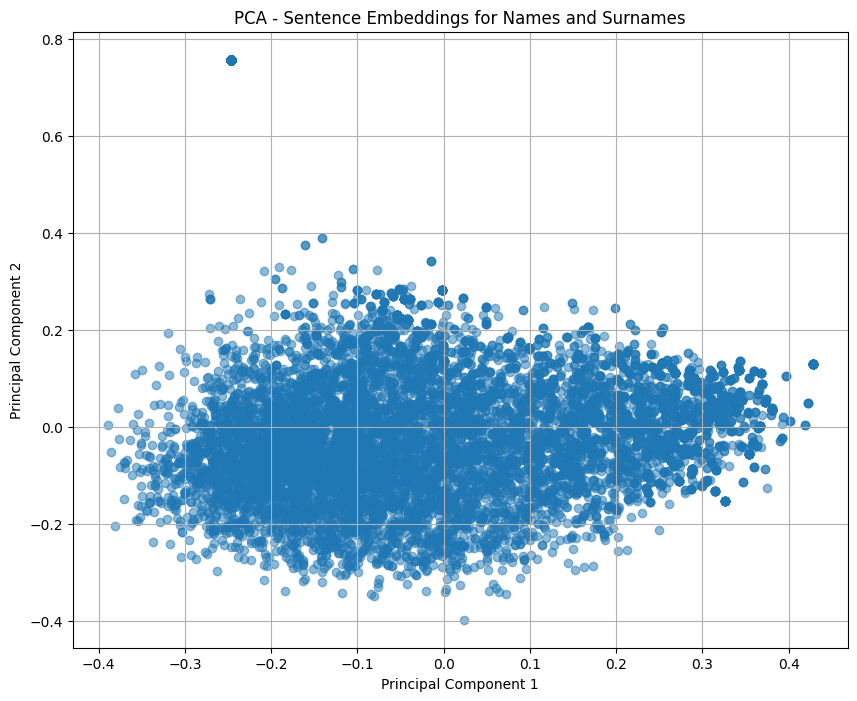

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform PCA
pca = PCA(n_components=2)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = pca.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['Component 1', 'Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['Component 1'], df_reduced['Component 2'], alpha=0.5)
plt.title('PCA - Sentence Embeddings for Names and Surnames')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [16]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

explained_var_ratios = []
for n_components in range(2, 11):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    explained_var_ratios.append(np.sum(pca.explained_variance_ratio_))

# Print the explained variance ratios for each dimension from 2D to 10D
for n, explained_var_ratio in enumerate(explained_var_ratios, start=2):
    print(f"Explained Variance Ratio for {n}D: {explained_var_ratio:.4f}")


Explained Variance Ratio for 2D: 0.0811
Explained Variance Ratio for 3D: 0.1080
Explained Variance Ratio for 4D: 0.1280
Explained Variance Ratio for 5D: 0.1473
Explained Variance Ratio for 6D: 0.1646
Explained Variance Ratio for 7D: 0.1804
Explained Variance Ratio for 8D: 0.1950
Explained Variance Ratio for 9D: 0.2086
Explained Variance Ratio for 10D: 0.2215


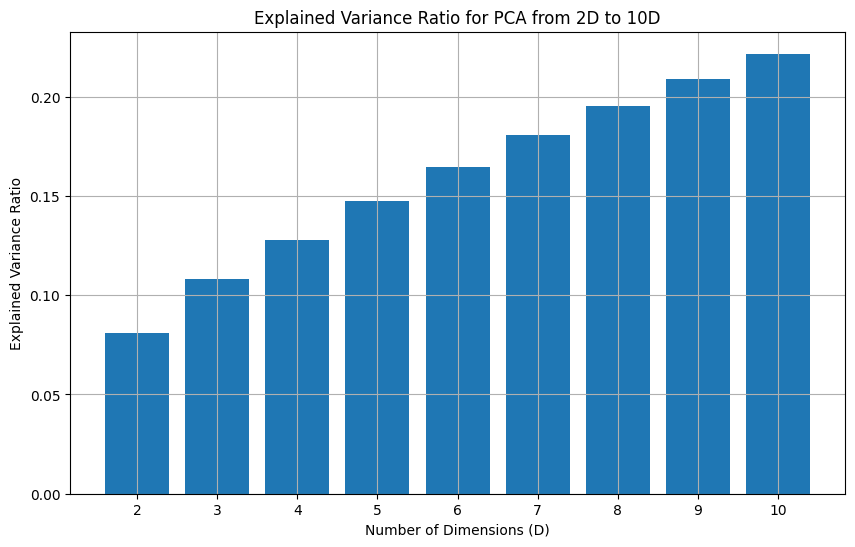

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

explained_var_ratios = []
for n_components in range(2, 11):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    explained_var_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratios in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(2, 11), explained_var_ratios)
plt.xlabel('Number of Dimensions (D)')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA from 2D to 10D')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


## UMAP

We find out that umap make a large blob. Not useful.

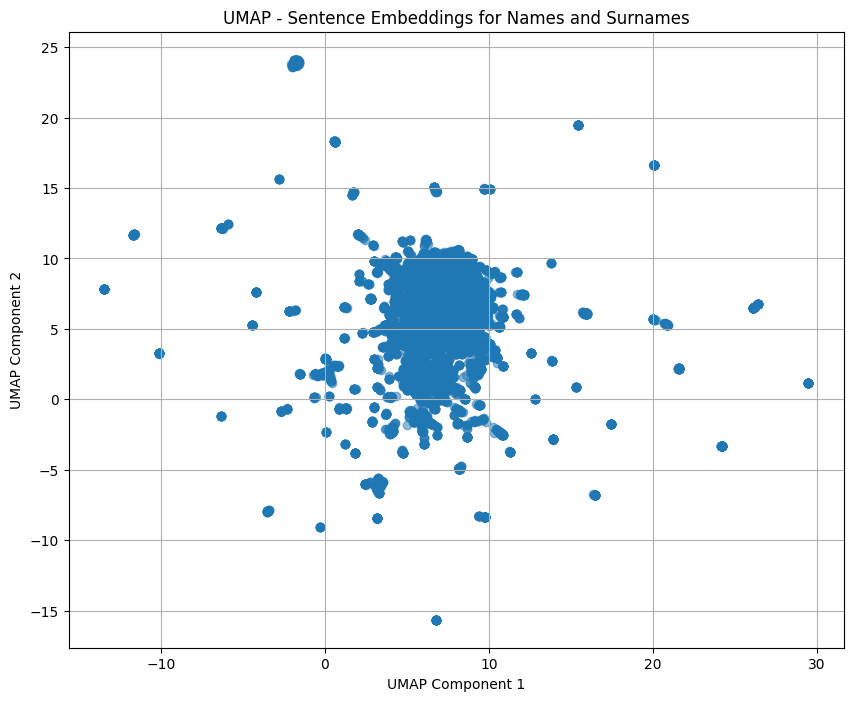

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import umap

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform UMAP
umap_model = umap.UMAP(n_components=2)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = umap_model.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['UMAP Component 1', 'UMAP Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['UMAP Component 1'], df_reduced['UMAP Component 2'], alpha=0.5)
plt.title('UMAP - Sentence Embeddings for Names and Surnames')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()


In [19]:
df_reduced

,UMAP Component 1,UMAP Component 2
0,5.141842,5.372617
1,4.676827,-3.714006
2,8.293956,-4.761534
3,8.473482,4.562734
4,5.137908,5.363623
...,...,...
9995,-0.510573,1.719876
9996,7.024812,3.062189
9997,8.742426,6.020168
9998,5.410881,1.993981


In [20]:
df_reduced

,UMAP Component 1,UMAP Component 2
0,5.141842,5.372617
1,4.676827,-3.714006
2,8.293956,-4.761534
3,8.473482,4.562734
4,5.137908,5.363623
...,...,...
9995,-0.510573,1.719876
9996,7.024812,3.062189
9997,8.742426,6.020168
9998,5.410881,1.993981


## Export UMAP dataset

In [21]:
df.reset_index(drop=True, inplace=True)

In [22]:
df_to_export = pd.merge(df, df_reduced, left_index=True, right_index=True)

In [23]:
df_to_export.to_csv('dimensions_ummap_v2.csv')

## TSNE

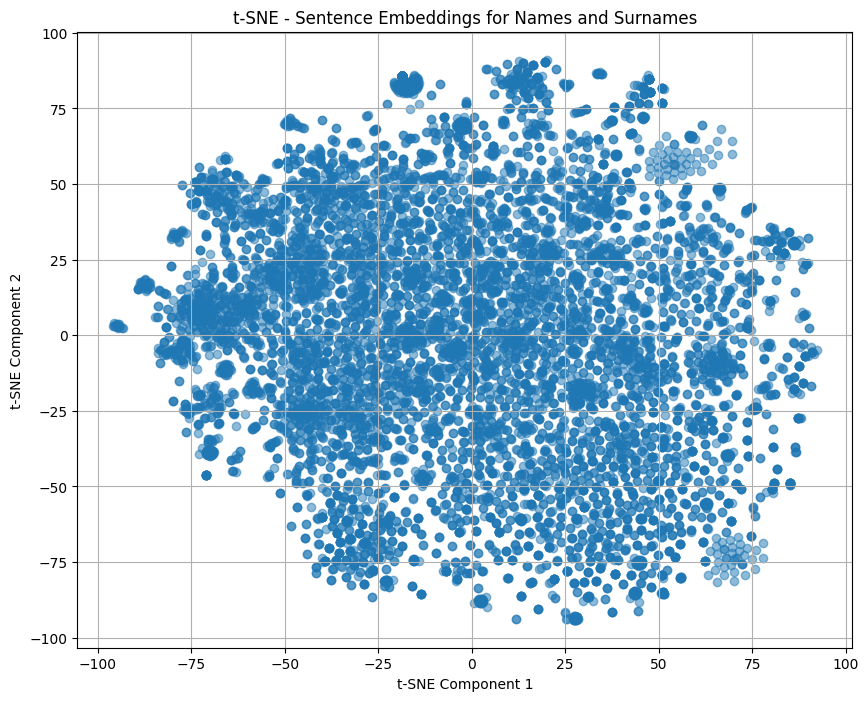

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform t-SNE
tsne_model = TSNE(n_components=2, random_state=42)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = tsne_model.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['t-SNE Component 1'], df_reduced['t-SNE Component 2'], alpha=0.5)
plt.title('t-SNE - Sentence Embeddings for Names and Surnames')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [25]:
df_to_export = pd.merge(df, df_reduced, left_index=True, right_index=True)
df_to_export.to_csv('dimensions_tsne_v2.csv')